# Group assignment

We investigate data on airfoil designs for aircraft. An airfoil is a the shape of a blade, wing or blade (of a turbine, propeller, rotor).
The data is on self-generated noise of an airfoil blade encountering smooth flow. A series of aerodynamic and acoustic tests were conducted in an anechoic wind tunnel on two- and three-dimensional airfoil blade sections. 
The self-noise is produced when the airfoil blade interacts with the turbulence produced by its boundary layer and its wake over nonturbulent inflow. The experiment studies how noise mechanisms affect operation of the airfoil. 

The data is in the file `airfoil-selfnoise.dat`. The data is from 7 NACA 0012 airfoil blade sections of different sizes (chord lengths from 2.5 to 61 cms) tested at wind tunnel speeds up to Mach 0.21 (Reynold's number based on chord up to $3 \times 10^6$) and at angles of attack from 0° to 22.2°.

So the following information is contained in the file:

    1. Frequency, in Hertzs.
    2. Angle of attack, in degrees.
    3. Chord length, in meters.
    4. Free-stream velocity, in meters per second.
    5. Suction side displacement thickness, in meters.

The target variable:

    6. Scaled sound pressure level, in decibels. 

We'll be investigating how different features interact with sound pressure. As usual, we'll generate summary statistics, visualize data, determining relationships in the data. We'll also apply a simple regression model to predict the sound pressure.

# Explore and visualize the data

We'll use the following online source to help us start on exploring the dataset. 
[Predicting airfoil self-noise using wind tunnel data and machine learning](http://www.datasciencedude.com/2015/05/31/test/). 

#### Import the necessary libraries for data manipulation and visualization; then load the data into a dataframe. Investigate the types of the variables, i.e., are the variables numeric or categoric?

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", font_scale=2)

from sklearn import linear_model
import scipy.stats as stats

In [2]:
file_path = 'airfoil_self_noise.dat'

# Import Data from csv file
data = pd.read_csv(file_path, sep='\t', names = ["Frequency_[Hz]", "Angle_of_attack_[degrees]", "Chord_length_[meters]", "Free-stream_velocity_[meters per second]", "Suction_side_displacement_thickness_[meters]", "Scaled_sound_pressure_level_[decibels]"])

In [3]:
# Investigate the data types
data.dtypes

Frequency_[Hz]                                    int64
Angle_of_attack_[degrees]                       float64
Chord_length_[meters]                           float64
Free-stream_velocity_[meters per second]        float64
Suction_side_displacement_thickness_[meters]    float64
Scaled_sound_pressure_level_[decibels]          float64
dtype: object

In [4]:
# All the fields are numeric. The fields are floats with exception of frequency which is an integer

### Feature engineering

Feature engineering is a way to create new features using features already in the dataset. Here we're going to combine two features in the datset with a deterministic relationship between them. We're going to create something called Reynolds number.

#### The case of Reynolds number

Two features in the dataset, namely free stream velocity (m/s) and chord length (m), can be used to determine something called Reynolds number. According to [Wikipedia](https://en.wikipedia.org/wiki/Reynolds_number), Reynolds number, a dimensionaless quantity, is the ratio of internal forces to viscous forces within fluids, like air or water. This experiment is about the dynamics of air flow over an airfoil. Suffice to say, Reynolds number determines different flow patterns in different flow situations. Reynolds number for the chord length $Re$ is calculated as

$$Re = (\text{free stream velocity}) * (\dfrac{\text{chord length}}{\text{kinematic viscosity}}).$$ The kinematic viscousity for air at $27^{\circ}$ is $1.568 \times 10^{-5}$. [Wikipedia says](https://en.wikipedia.org/wiki/Reynolds_number) that "at low Reynolds numbers flow tends to be sheet-like, while at high Reynolds numbers turbulence occurs due to differences in the fluid's speed and direction, which may sometimes intersect or even move counter to the overall direction of the flow".

#### Let's use this information to create a new variable called $Re$ in our dataframe. Check to see that the Reynolds numbers are not greater than $3 \times 10^6$.

In [5]:
# Assuming analisis at 27 degrees.

In [6]:
# Add the coloumn for the calculated Reynolds number to the dataset
data['Re'] = data['Free-stream_velocity_[meters per second]']*(data['Chord_length_[meters]']/0.00001568)

In [7]:
data.describe()

,Frequency_[Hz],Angle_of_attack_[degrees],Chord_length_[meters],Free-stream_velocity_[meters per second],Suction_side_displacement_thickness_[meters],Scaled_sound_pressure_level_[decibels],Re
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1.503000e+03
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943,4.432690e+05
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657,3.450371e+05
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000,5.135077e+04
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000,1.282959e+05
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000,3.848878e+05
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500,6.929923e+05
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000,1.385985e+06


In [8]:
# From the statistical summary above, it is confimed that the calculated Reynolds numbers do not exceed 3×10^6

## Some visualizations

What can we learn from the data? What are the relationships between the features? What is the relationship between frequency and noise, for instance? Let's plot frequency against noise for different angles. Use the groupby to determine how many angles and their values. Recall that groupby returns a dictionary who's keys are the column used to group by.

#### Consider the frequency and noise level, how they interact. For each angle of attack, plot the frequency against noise levels.  And for each Reynolds number, plot frequency against noise levels. Discuss your observations.

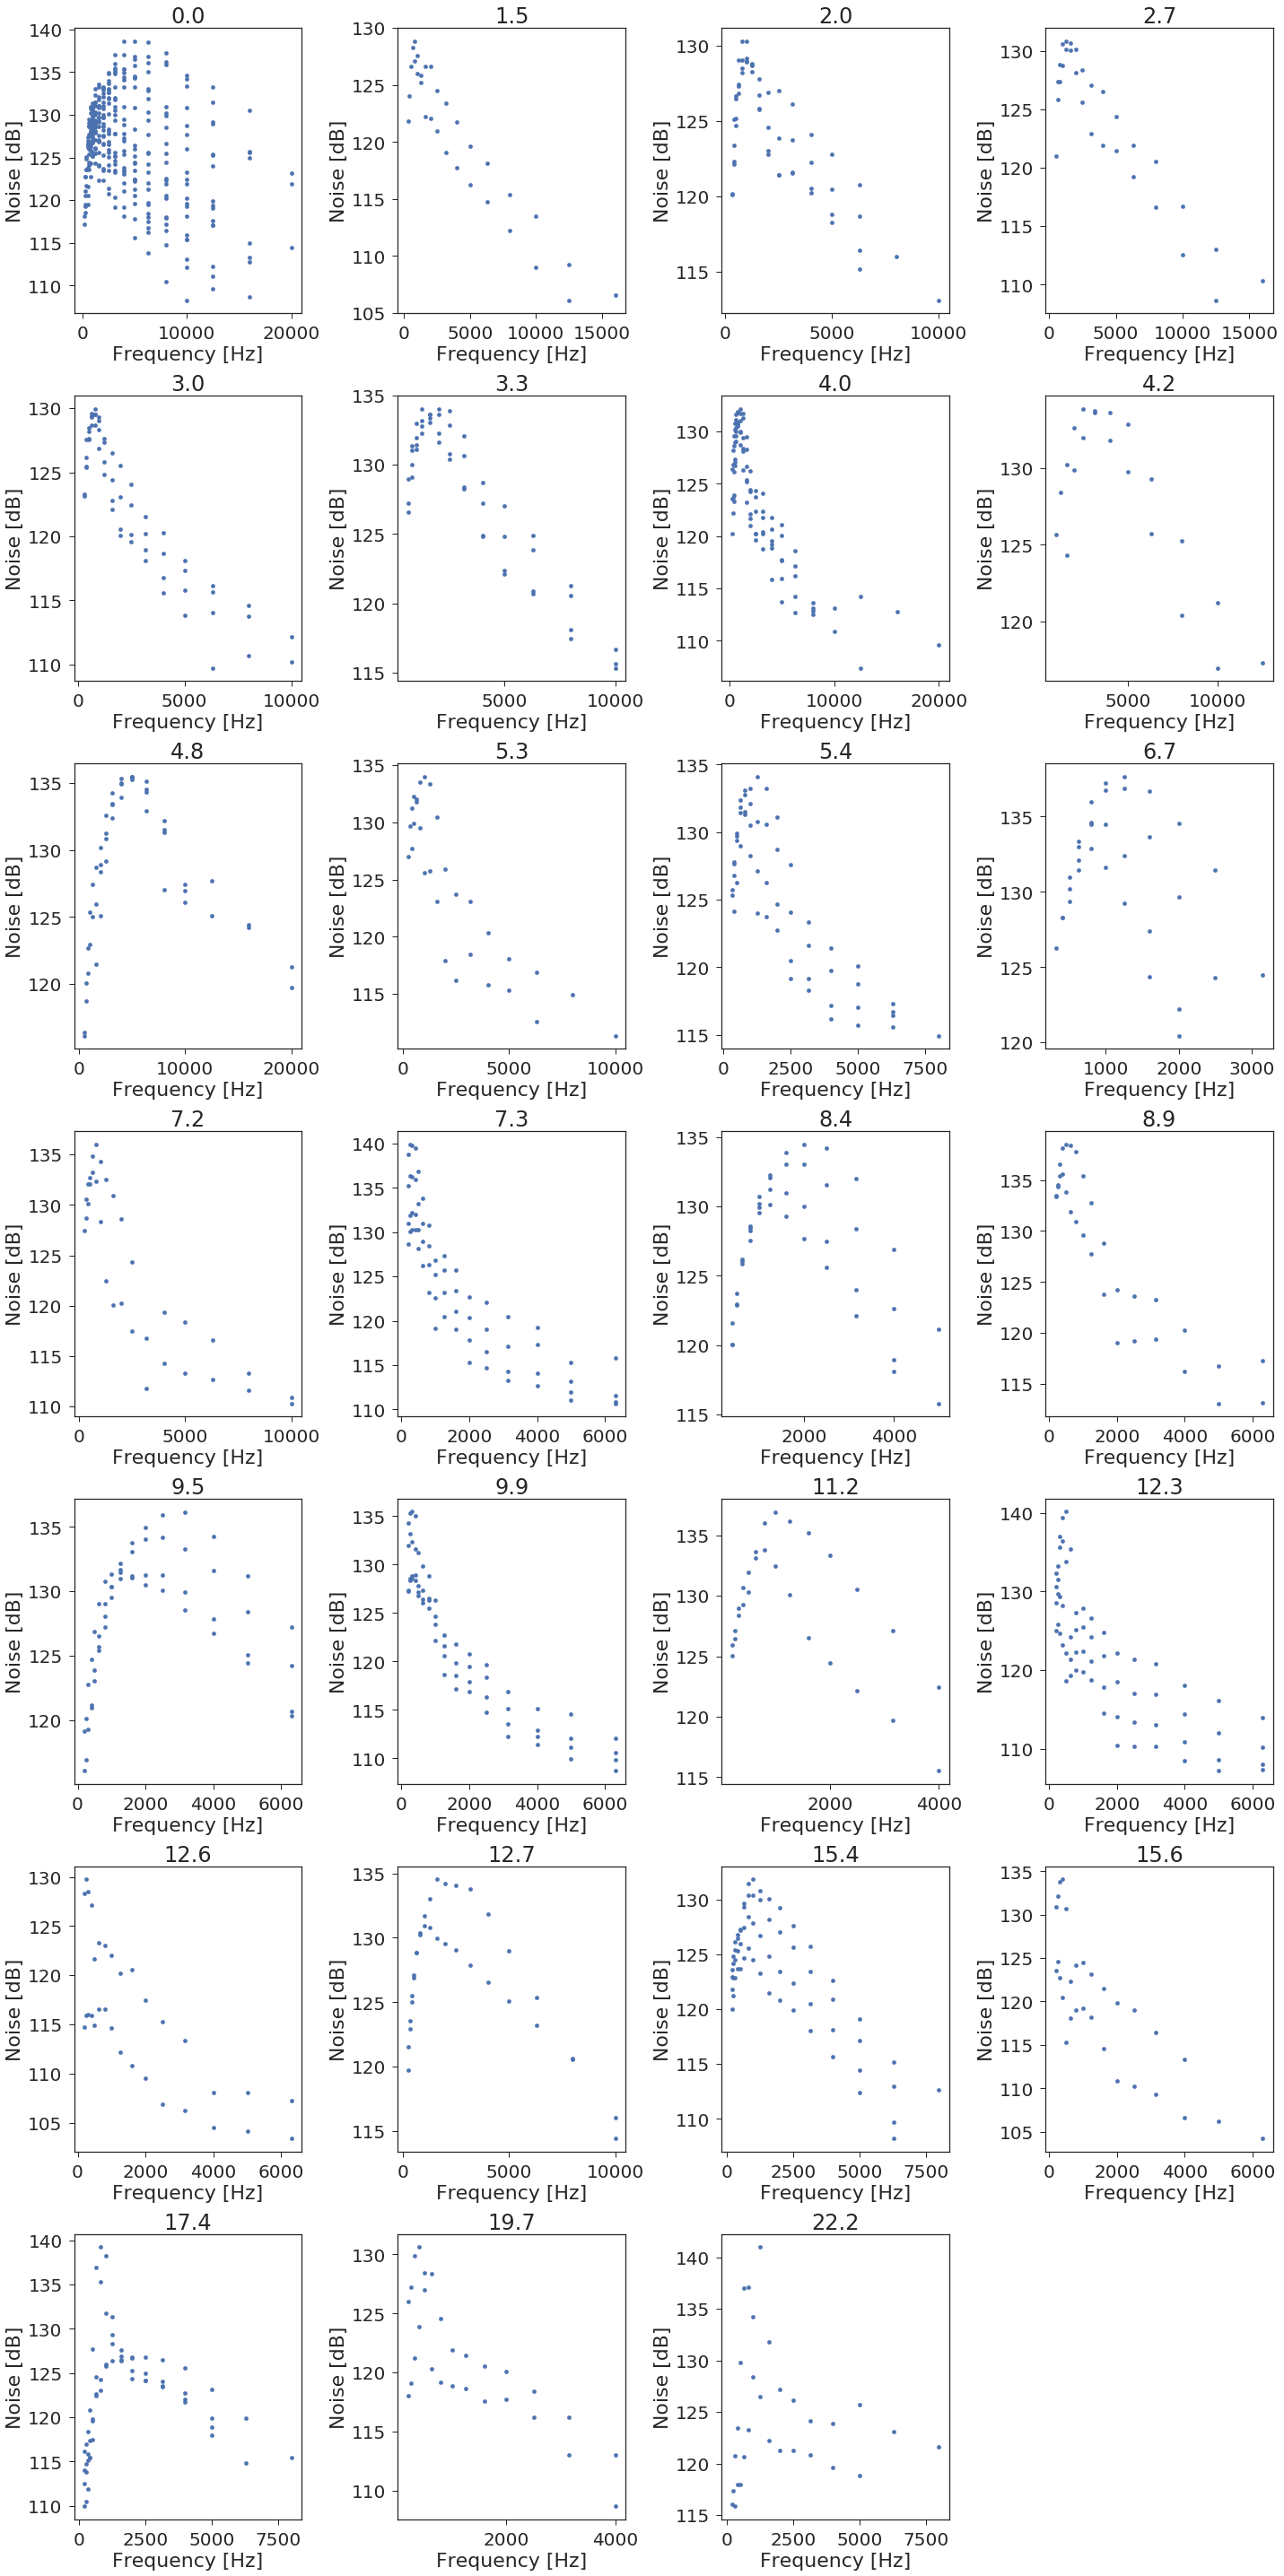

In [9]:
# For each angle of attack:

# Set the figure size
plt.figure(figsize=(20,40))

# Create the plots
plot_number = 1 # keep track of nr. plots
for tl, sl in data.groupby('Angle_of_attack_[degrees]'):
    ax = plt.subplot(7,4, plot_number)# create a 7 by 4 grid
    sl.plot.scatter(x='Frequency_[Hz]', y='Scaled_sound_pressure_level_[decibels]', ax=ax, label=tl, legend=False)
    ax.set_title(tl)
    ax.set_xlabel('Frequency [Hz]')
    ax.set_ylabel('Noise [dB]')

    # Go to the next plot for the next loop
    plot_number = plot_number + 1
plt.tight_layout() # fits plots tightly together


# Show the plot
plt.show() 

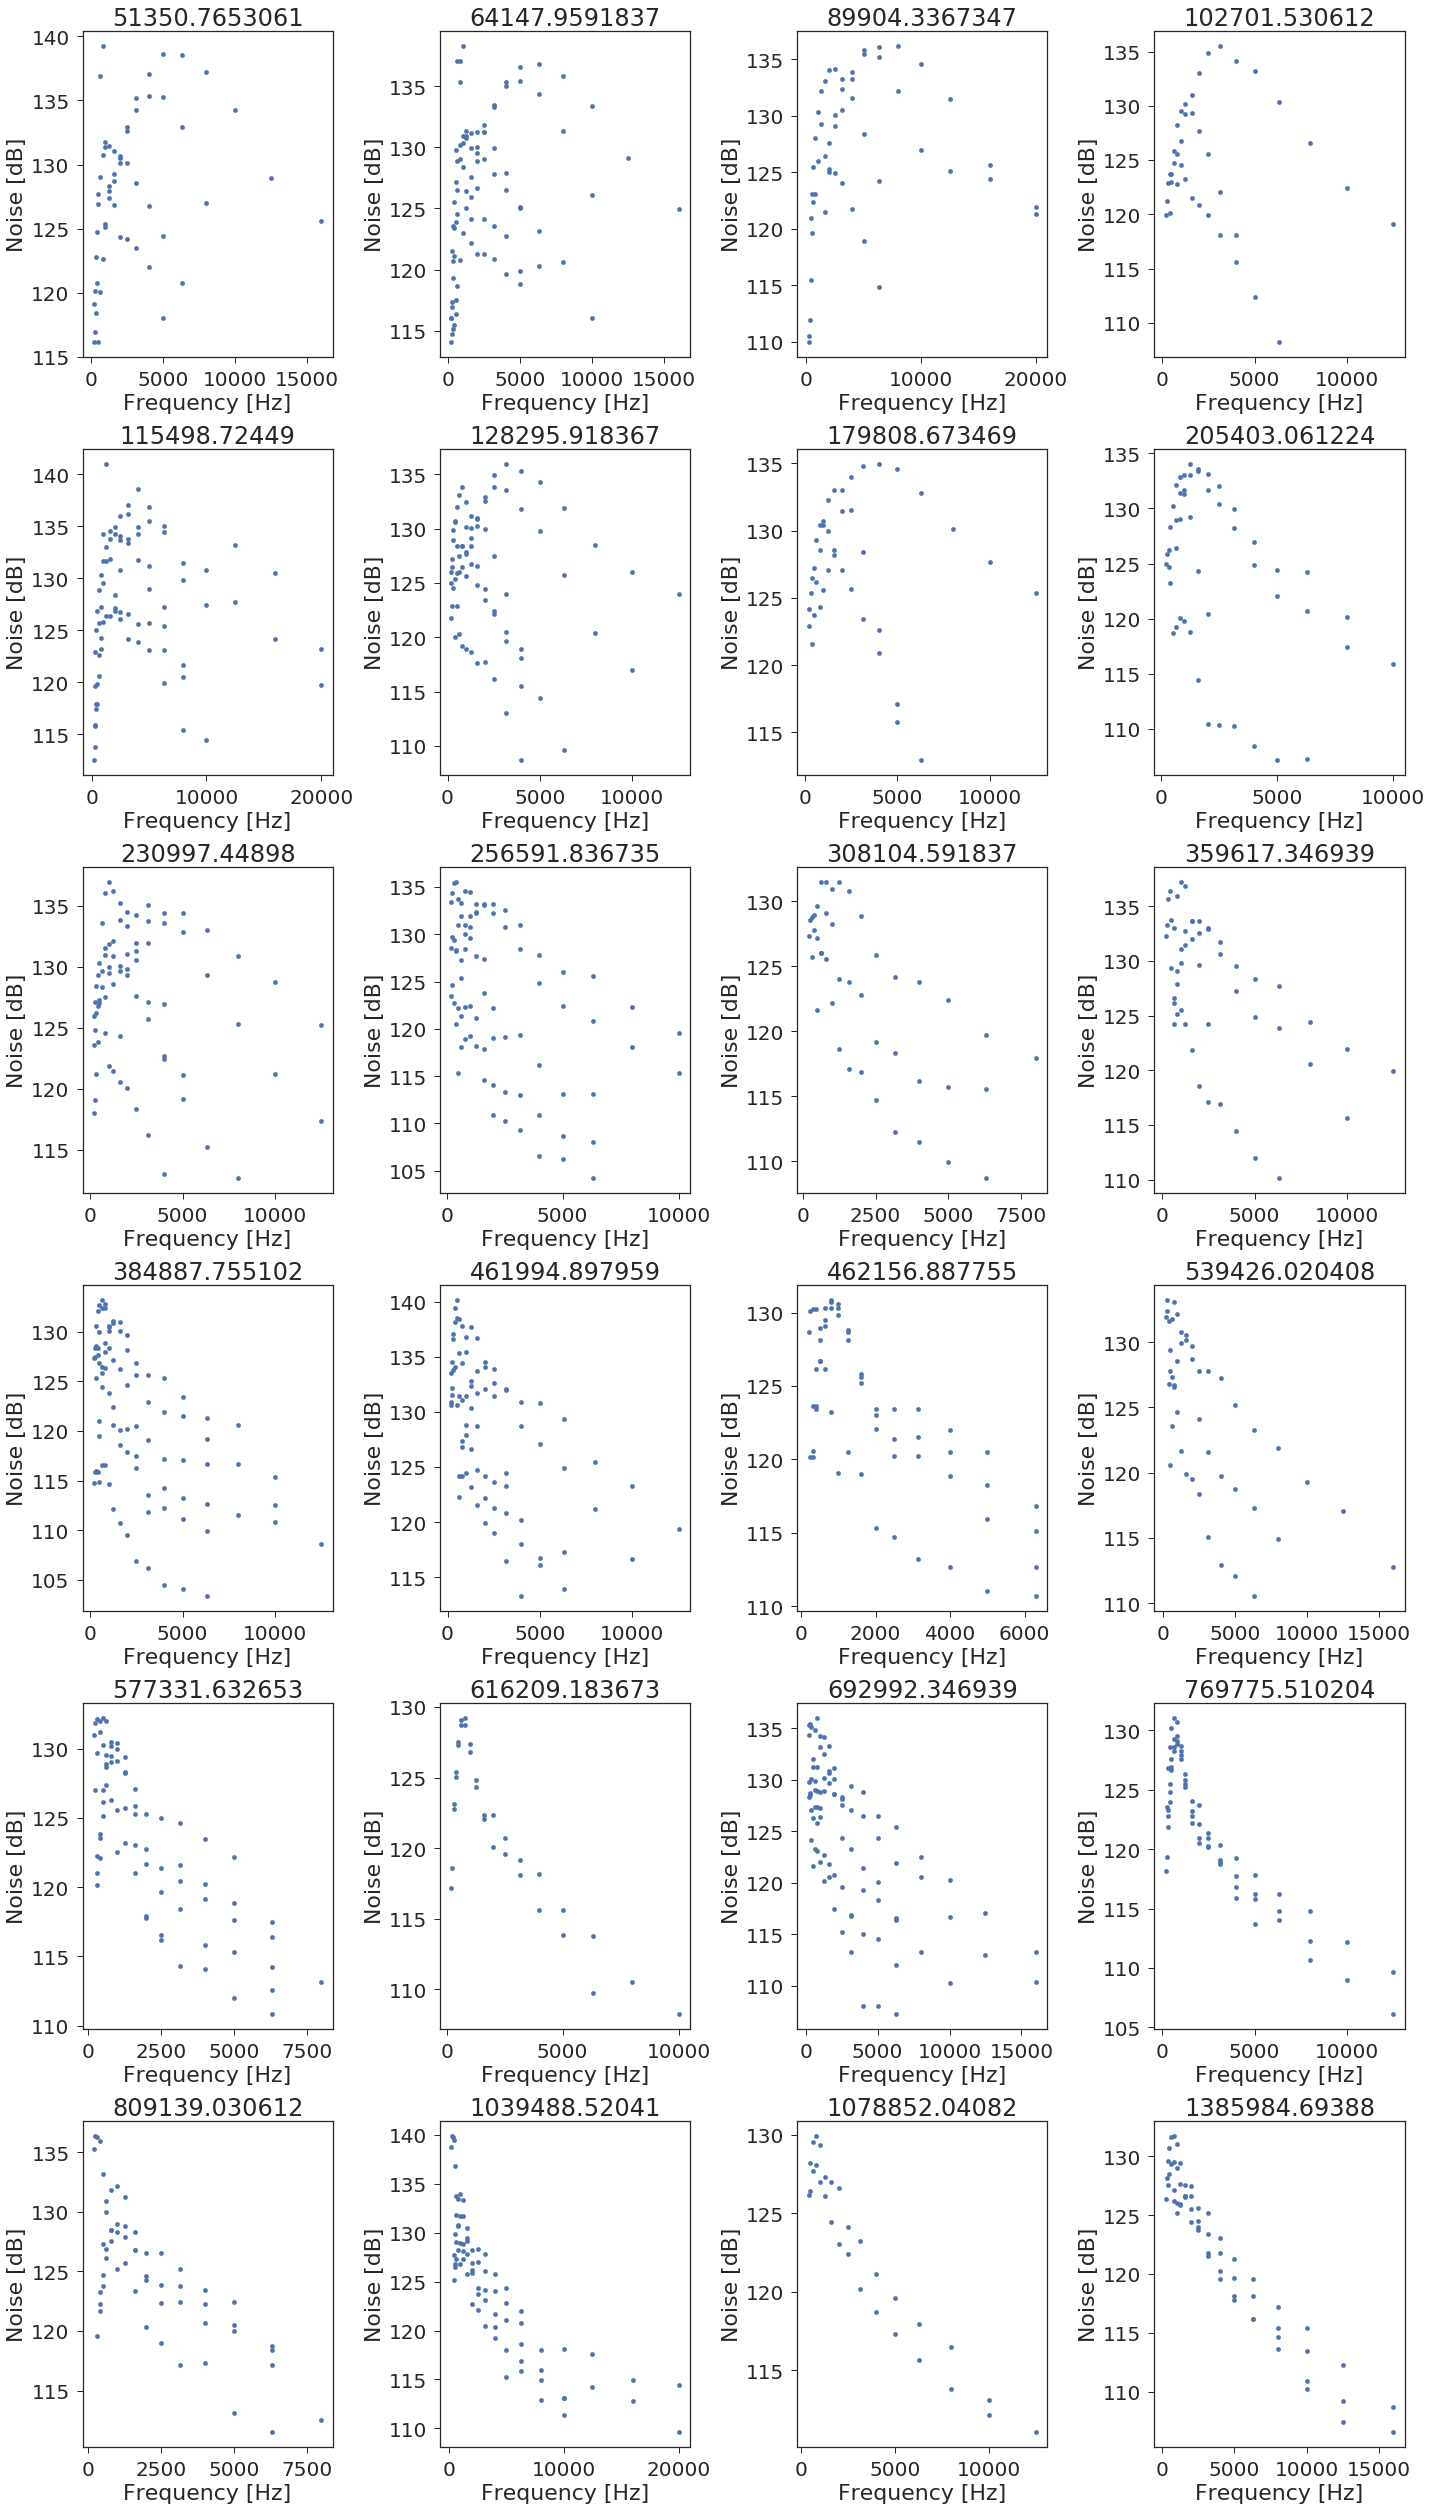

In [10]:
# For Reynolds numbers:

# Set the figure size
plt.figure(figsize=(20,40))

# Create the plots
plot_number = 1 # keep track of nr. plots
for tl, sl in data.groupby('Re'):
    ax = plt.subplot(7,4, plot_number)# create a 7 by 4 grid
    sl.plot.scatter(x='Frequency_[Hz]', y='Scaled_sound_pressure_level_[decibels]', ax=ax, label=tl, legend=False)
    ax.set_title(tl)
    ax.set_xlabel('Frequency [Hz]')
    ax.set_ylabel('Noise [dB]')

    # Go to the next plot for the next loop
    plot_number = plot_number + 1
plt.tight_layout() # fits plots tightly together


# Show the plot
plt.show() 

#### Do more exploration. For example, for the different velocities with attack angle equal to zero and chord length = 0.3048, plot the frequency against noise level? Discuss your observations.

In [11]:
# Create a data subset with attack angle equal to zero and chord length = 0.3048
velocity_exploration = data[(data['Angle_of_attack_[degrees]'] == 0) & (data['Chord_length_[meters]'] == 0.3048)]

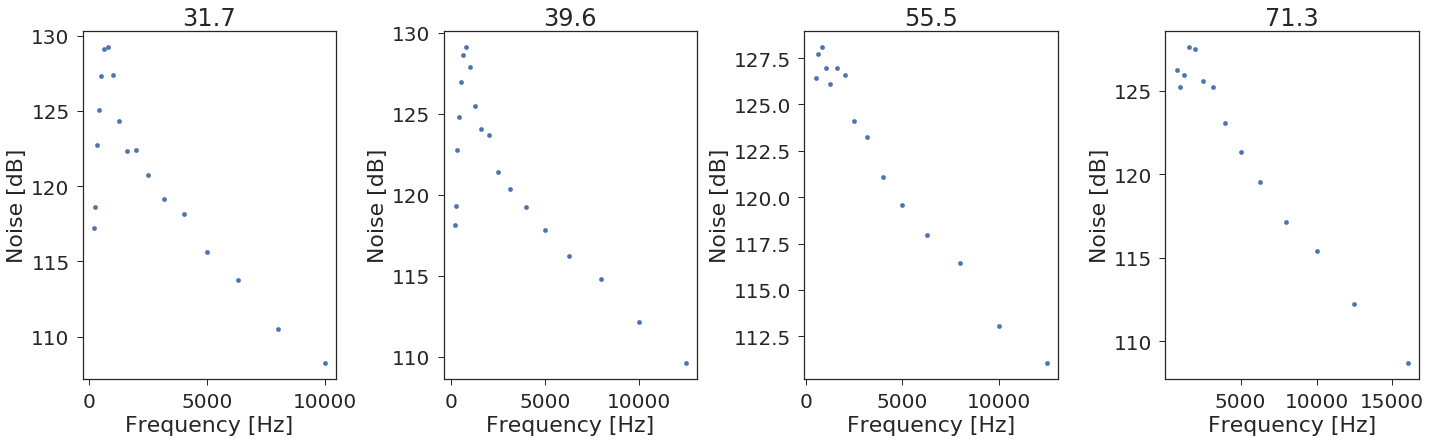

In [12]:
# For different velocities:

# Set the figure size
plt.figure(figsize=(20,40))

# Create the plots
plot_number = 1 # keep track of nr. plots
for tl, sl in velocity_exploration.groupby('Free-stream_velocity_[meters per second]'):
    ax = plt.subplot(7,4, plot_number)# create a 7 by 4 grid
    sl.plot.scatter(x='Frequency_[Hz]', y='Scaled_sound_pressure_level_[decibels]', ax=ax, label=tl, legend=False)
    ax.set_title(tl)
    ax.set_xlabel('Frequency [Hz]')
    ax.set_ylabel('Noise [dB]')

    # Go to the next plot for the next loop
    plot_number = plot_number + 1
plt.tight_layout() # fits plots tightly together


# Show the plot
plt.show() 

In [13]:
# It is observed that the differences in velocity does not have a large effect on the Noise in relation to the frequency.
#        For all the observed velocities, teh noise ranges from approximately 110 to 130 dB

### Relationships between variables

#### Continue to explore relationships between variables by genearating correlation matrix. Identify which variables are highly correlated.
Whether two variables are highly correlated can still be significant for determining a target variable. Variables can be strongly related but not correlated. For now we use correlation determine those features that are related.

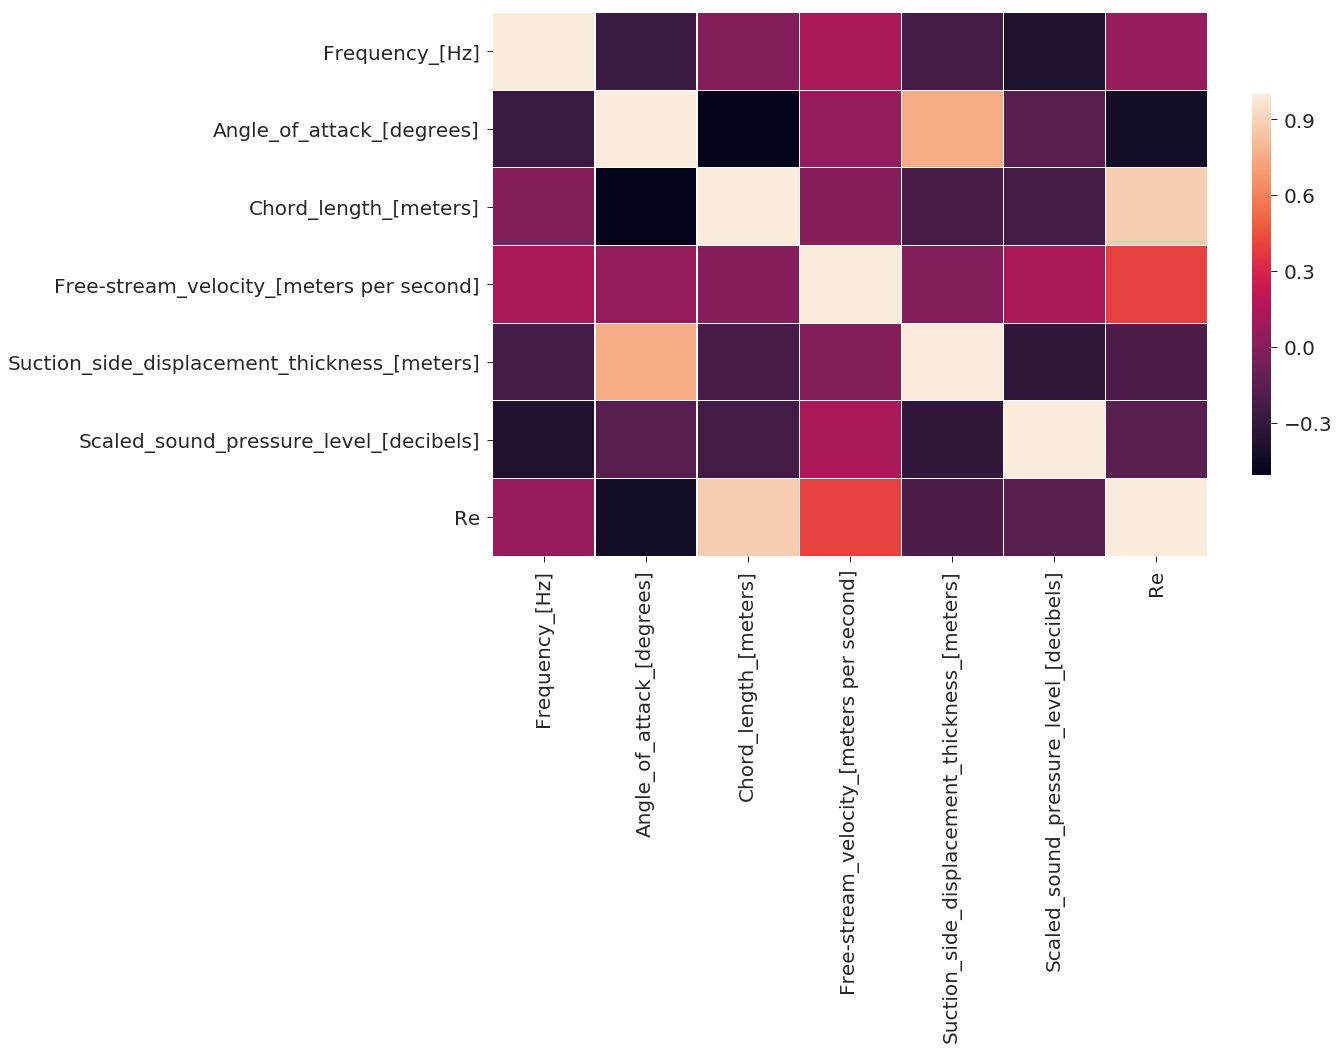

In [14]:
# Determine the correlation between features
corr = data.corr()

# PLot the correlation heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(corr, xticklabels=corr.columns.values, 
            yticklabels=corr.columns.values,  
            linewidths=.08,                   # set linewidth between entries in matrix
           cbar_kws={"shrink": .7}) 

In [15]:
# we can notice an important correlation between the chord length and the Reynolds number 

## Formulating a hypothesis

In this case we test a simple hypothesis, that the relationship between the thickness of the airfoil shape is related to noise level. Is this relationship significant? The Pearson correlation function from scipy stats performs a test and returns a p-value. Interpret the p-value.

#### Is there a relationship between thickness and noise level signficant?
Visualize this relationship if you so wish.

In [16]:
# Determining the p-value for the  relationship between thickness and noise level
stats.ttest_rel(data['Suction_side_displacement_thickness_[meters]'], data['Scaled_sound_pressure_level_[decibels]'])

Ttest_relResult(statistic=-701.0619109240962, pvalue=0.0)

In [17]:
# If a significance level of 0.05 is assumed, the p-value of 0.0 is below this and it is assumed not to be of significance.

## Regression

Implement a multiple regression model to determine the target variable using the given predictor variables, namely, the noise level.

In [18]:
# Using the data from "Frequency_[Hz]", "Angle_of_attack_[degrees]", "Chord_length_[meters]", 
#        "Free-stream_velocity_[meters per second]", "Suction_side_displacement_thickness_[meters]", 
#        to predict the "Scaled_sound_pressure_level_[decibels]"

('Intercept: ', 132.83380577837855)
('Coefficient: ', array([-1.28220711e-03, -4.21911706e-01, -3.56880012e+01,  9.98540449e-02,
       -1.47300519e+02]))
('R-Squared: ', 0.5157097420928733)


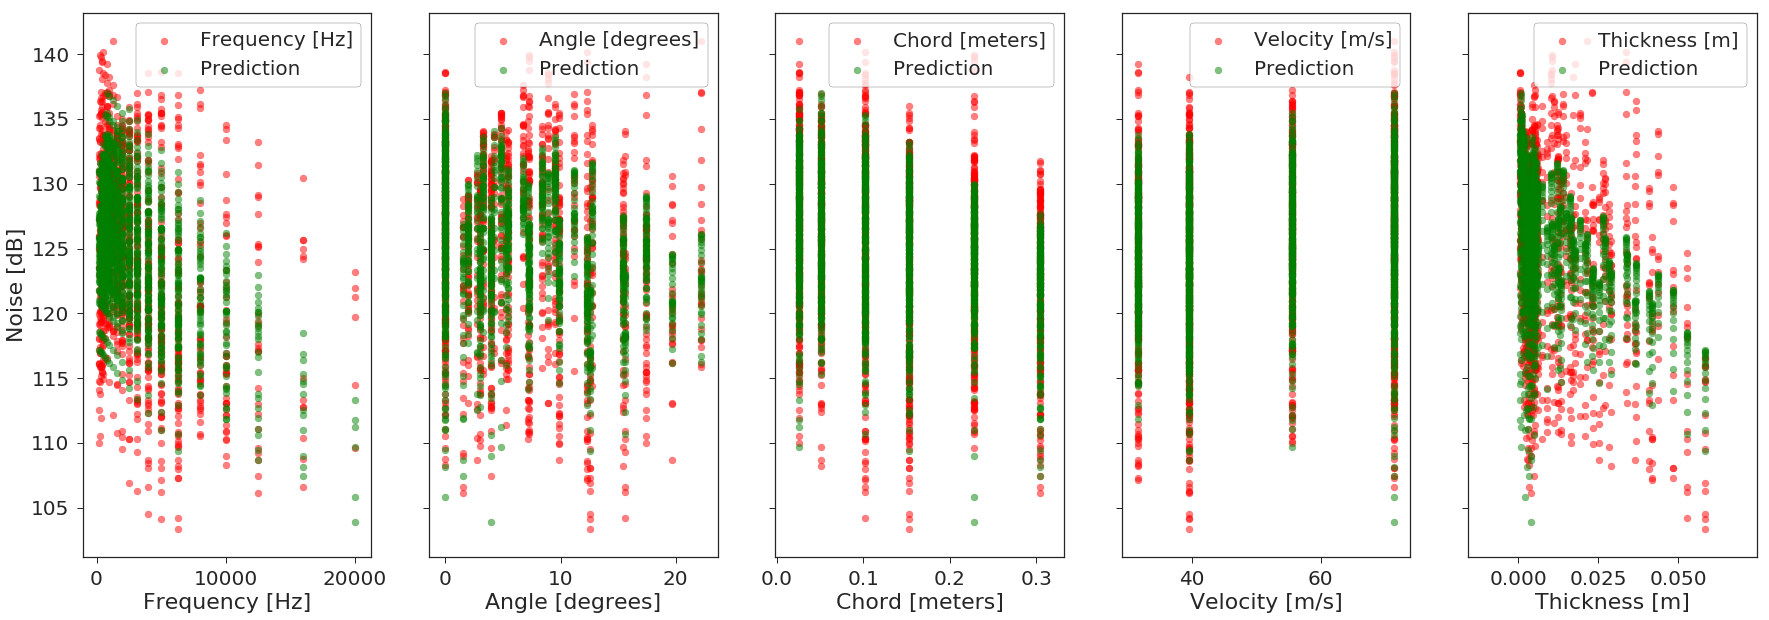

In [19]:
# Initialize the model
multipleLinearRegression = linear_model.LinearRegression()

# Format the data into lists
ex1 = data['Frequency_[Hz]'].tolist()
ex2 = data['Angle_of_attack_[degrees]'].tolist()
ex3 = data['Chord_length_[meters]'].tolist()
ex4 = data['Free-stream_velocity_[meters per second]'].tolist()
ex5 = data['Suction_side_displacement_thickness_[meters]'].tolist()

explanatoryVariable = [[ex1[i], ex2[i], ex3[i], ex4[i], ex5[i]] for i in range(len(ex1))]

dependentVariable = data['Scaled_sound_pressure_level_[decibels]'].tolist()

# Fit the data to the model
multipleLinearRegression.fit(X = explanatoryVariable, y = dependentVariable)

# Extract the model parameters:
print ("Intercept: ", multipleLinearRegression.intercept_)
print ("Coefficient: ",multipleLinearRegression.coef_)
print ("R-Squared: ",multipleLinearRegression.score(explanatoryVariable, dependentVariable))

# Create 3 subplots, sharing the y axis
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, sharey=True, figsize=(30,10))

# Plot the scatter for input ex1
l1 = ax1.scatter(ex1, dependentVariable,  c="red", alpha=0.5, label="Frequency [Hz]")
ax1.set_xlabel('Frequency [Hz]')
# Plot the model prediction based on ex1
ax1.scatter(ex1, [multipleLinearRegression.predict([x]) for x in explanatoryVariable], c="g", alpha=0.5, label="Prediction")
ax1.legend(frameon=True, loc=1).get_frame().set_edgecolor('black')

# Plot the scatter for input ex2
l2 = ax2.scatter(ex2, dependentVariable,  c="red", alpha=0.5, label="Angle [degrees]")
ax2.set_xlabel('Angle [degrees]')
# Plot the model prediction based on ex2
ax2.scatter(ex2, [multipleLinearRegression.predict([x]) for x in explanatoryVariable], c="g", alpha=0.5, label="Prediction")
ax2.legend(frameon=True, loc=1).get_frame().set_edgecolor('black')

# Plot the scatter for input ex3
l3 = ax3.scatter(ex3, dependentVariable,  c="red", alpha=0.5, label="Chord [meters]")
ax3.set_xlabel('Chord [meters]')
# Plot the model prediction based on ex3
ax3.scatter(ex3, [multipleLinearRegression.predict([x]) for x in explanatoryVariable], c="g", alpha=0.5, label="Prediction")
ax3.legend(frameon=True, loc=1).get_frame().set_edgecolor('black')

# Plot the scatter for input ex4
l4 = ax4.scatter(ex4, dependentVariable,  c="red", alpha=0.5, label="Velocity [m/s]")
ax4.set_xlabel('Velocity [m/s]')
# Plot the model prediction based on ex4
ax4.scatter(ex4, [multipleLinearRegression.predict([x]) for x in explanatoryVariable], c="g", alpha=0.5, label="Prediction")
ax4.legend(frameon=True, loc=1).get_frame().set_edgecolor('black')

# Plot the scatter for input ex5
l5 = ax5.scatter(ex5, dependentVariable,  c="red", alpha=0.5, label="Thickness [m]")
ax5.set_xlabel('Thickness [m]')
# Plot the model prediction based on ex5
ax5.scatter(ex5, [multipleLinearRegression.predict([x]) for x in explanatoryVariable], c="g", alpha=0.5, label="Prediction")
ax5.legend(frameon=True, loc=1).get_frame().set_edgecolor('black')


# Set the plot labels
ax1.set_ylabel('Noise [dB]')

# Show the plot
plt.show() 